<a class="anchor" id="0.1"></a>
# **Table of Contents**

1. [Import library](#1)
2. [Load data](#2)
3. [Exploratory Data Analyst](#3)
4. [KNN Regression Model ](#4)
5. [Random Forest Model  ](#5)

### **1. Import library** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


In [5]:
import pandas as pd
from src.hiveconnect import hiveapp
import matplotlib.pyplot as plt
import seaborn as sns
# Model from KNN 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
# Model Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

C:\Users\dtptr\AppData\Local\Temp\ipykernel_24336\1814670130.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### **2. Load data** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


In [6]:
df_inventory_textfile=hiveapp.df_rows_details("""SELECT *
FROM Fact_Inventory_Analysis_TextFile fact_txt
JOIN DimInventory di ON fact_txt.inventory_key = di.inventory_key
JOIN DimRental dr ON fact_txt.rental_key = dr.rental_key
JOIN DimDate dd ON fact_txt.rental_date_key = dd.date_key
""",'dtptr')

d:\Project_HK2_2024\Big_Data_Analysis\Final_Project\ProjectBDA\src\hiveconnect\hiveapp.py:182: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)



 converting the rows_data into DataFrame 

converted successfully the rows_data into DataFrame
      fact_txt.inventory_key  fact_txt.rental_key  fact_txt.rental_date_key  \
0                          0                 3516                  19960101   
1                          0                10084                  19960102   
2                          0                13365                  19960103   
3                          1                  771                  19960104   
4                          1                 2840                  19960105   
...                      ...                  ...                       ...   
2186                     626                  810                  20011226   
2187                     626                 5473                  20011227   
2188                     626                 7783                  20011228   
2189                     626                13706                  20011229   
2190                     626       

In [7]:
df_inventory_textfile.head(5)

,fact_txt.inventory_key,fact_txt.rental_key,fact_txt.rental_date_key,fact_txt.remaining,fact_txt.total_rental_amount,di.inventory_key,di.inventory_id,di.title,di.description,di.release_year,...,dd.month_num_overall,dd.month_name,dd.month_abbrev,dd.quarter,dd.year,dd.year_month,dd.fiscal_month,dd.fiscal_quarter,dd.fiscal_year,dd.month_end_flag
0,0,3516,19960101,4578,8.97,0,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,...,1,January,Jan,1,1996,199601,7,3,1996,N
1,0,10084,19960102,4578,8.97,0,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,...,1,January,Jan,1,1996,199601,7,3,1996,N
2,0,13365,19960103,4578,8.97,0,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,...,1,January,Jan,1,1996,199601,7,3,1996,N
3,1,771,19960104,4576,7.95,1,2,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,...,1,January,Jan,1,1996,199601,7,3,1996,N
4,1,2840,19960105,4576,7.95,1,2,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,...,1,January,Jan,1,1996,199601,7,3,1996,N


In [8]:
df_inventory_orc=hiveapp.df_rows_details("""SELECT *
FROM Fact_Inventory_Analysis_ORC fact_orc
JOIN DimInventory di ON fact_orc.inventory_key = di.inventory_key
JOIN DimRental dr ON fact_orc.rental_key = dr.rental_key
JOIN DimDate dd ON fact_orc.rental_date_key = dd.date_key
""",'dtptr')

d:\Project_HK2_2024\Big_Data_Analysis\Final_Project\ProjectBDA\src\hiveconnect\hiveapp.py:182: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)



 converting the rows_data into DataFrame 

converted successfully the rows_data into DataFrame
      fact_orc.inventory_key  fact_orc.rental_key  fact_orc.rental_date_key  \
0                          0                 3516                  19960101   
1                          0                10084                  19960102   
2                          0                13365                  19960103   
3                          1                  771                  19960104   
4                          1                 2840                  19960105   
...                      ...                  ...                       ...   
2186                     626                  810                  20011226   
2187                     626                 5473                  20011227   
2188                     626                 7783                  20011228   
2189                     626                13706                  20011229   
2190                     626       

In [9]:
df_inventory_orc.head(5)

,fact_orc.inventory_key,fact_orc.rental_key,fact_orc.rental_date_key,fact_orc.remaining,fact_orc.total_rental_amount,di.inventory_key,di.inventory_id,di.title,di.description,di.release_year,...,dd.month_num_overall,dd.month_name,dd.month_abbrev,dd.quarter,dd.year,dd.year_month,dd.fiscal_month,dd.fiscal_quarter,dd.fiscal_year,dd.month_end_flag
0,0,3516,19960101,4578,8.97,0,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,...,1,January,Jan,1,1996,199601,7,3,1996,N
1,0,10084,19960102,4578,8.97,0,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,...,1,January,Jan,1,1996,199601,7,3,1996,N
2,0,13365,19960103,4578,8.97,0,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,...,1,January,Jan,1,1996,199601,7,3,1996,N
3,1,771,19960104,4576,7.95,1,2,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,...,1,January,Jan,1,1996,199601,7,3,1996,N
4,1,2840,19960105,4576,7.95,1,2,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,...,1,January,Jan,1,1996,199601,7,3,1996,N


In [10]:
df_inventory_orc.columns

Index(['fact_orc.inventory_key', 'fact_orc.rental_key',
       'fact_orc.rental_date_key', 'fact_orc.remaining',
       'fact_orc.total_rental_amount', 'di.inventory_key', 'di.inventory_id',
       'di.title', 'di.description', 'di.release_year', 'di.language',
       'di.rental_duration', 'di.rental_rate', 'di.length',
       'di.replacement_cost', 'di.rating', 'di.special_features',
       'di.catalogy_name', 'dr.rental_key', 'dr.rental_id', 'dr.rental_date',
       'dr.inventory_id', 'dr.customer_id', 'dr.return_date', 'dr.staff_id',
       'dr.amount', 'dr.payment_date', 'dd.date_key', 'dd.full_date',
       'dd.day_of_week', 'dd.day_num_in_month', 'dd.day_num_overall',
       'dd.day_name', 'dd.day_abbrev', 'dd.weekday_flag',
       'dd.week_num_in_year', 'dd.week_num_overall', 'dd.week_begin_date',
       'dd.week_begin_date_key', 'dd.month', 'dd.month_num_overall',
       'dd.month_name', 'dd.month_abbrev', 'dd.quarter', 'dd.year',
       'dd.year_month', 'dd.fiscal_month', 'dd.

In [11]:
df_inventory_orc.drop(columns=['di.inventory_key', 'dr.rental_key', 'dd.date_key'], inplace=True,axis=1)

### **3. Exploratory Data Analyst** <a id="3"></a>

[Table of Contents](#0.1)



In [12]:
df_inventory_orc.head(5)

,fact_orc.inventory_key,fact_orc.rental_key,fact_orc.rental_date_key,fact_orc.remaining,fact_orc.total_rental_amount,di.inventory_id,di.title,di.description,di.release_year,di.language,...,dd.month_num_overall,dd.month_name,dd.month_abbrev,dd.quarter,dd.year,dd.year_month,dd.fiscal_month,dd.fiscal_quarter,dd.fiscal_year,dd.month_end_flag
0,0,3516,19960101,4578,8.97,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,...,1,January,Jan,1,1996,199601,7,3,1996,N
1,0,10084,19960102,4578,8.97,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,...,1,January,Jan,1,1996,199601,7,3,1996,N
2,0,13365,19960103,4578,8.97,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,...,1,January,Jan,1,1996,199601,7,3,1996,N
3,1,771,19960104,4576,7.95,2,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,...,1,January,Jan,1,1996,199601,7,3,1996,N
4,1,2840,19960105,4576,7.95,2,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,...,1,January,Jan,1,1996,199601,7,3,1996,N


In [13]:
df_inventory_orc.shape

(2191, 47)

In [14]:
df_inventory_orc.columns

Index(['fact_orc.inventory_key', 'fact_orc.rental_key',
       'fact_orc.rental_date_key', 'fact_orc.remaining',
       'fact_orc.total_rental_amount', 'di.inventory_id', 'di.title',
       'di.description', 'di.release_year', 'di.language',
       'di.rental_duration', 'di.rental_rate', 'di.length',
       'di.replacement_cost', 'di.rating', 'di.special_features',
       'di.catalogy_name', 'dr.rental_id', 'dr.rental_date', 'dr.inventory_id',
       'dr.customer_id', 'dr.return_date', 'dr.staff_id', 'dr.amount',
       'dr.payment_date', 'dd.full_date', 'dd.day_of_week',
       'dd.day_num_in_month', 'dd.day_num_overall', 'dd.day_name',
       'dd.day_abbrev', 'dd.weekday_flag', 'dd.week_num_in_year',
       'dd.week_num_overall', 'dd.week_begin_date', 'dd.week_begin_date_key',
       'dd.month', 'dd.month_num_overall', 'dd.month_name', 'dd.month_abbrev',
       'dd.quarter', 'dd.year', 'dd.year_month', 'dd.fiscal_month',
       'dd.fiscal_quarter', 'dd.fiscal_year', 'dd.month_end_fla

#### 3.1 Overrall 
> After querying and combining the fact records with all dim tables, we see a total of (16045 rows, 47 columns)

#### 3.1.1 Structure of dataset

In [15]:
df_inventory_orc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fact_orc.inventory_key        2191 non-null   int64  
 1   fact_orc.rental_key           2191 non-null   int64  
 2   fact_orc.rental_date_key      2191 non-null   int64  
 3   fact_orc.remaining            2191 non-null   int64  
 4   fact_orc.total_rental_amount  2191 non-null   float64
 5   di.inventory_id               2191 non-null   int64  
 6   di.title                      2191 non-null   object 
 7   di.description                2191 non-null   object 
 8   di.release_year               2191 non-null   int64  
 9   di.language                   2191 non-null   object 
 10  di.rental_duration            2191 non-null   int64  
 11  di.rental_rate                2191 non-null   float64
 12  di.length                     2191 non-null   int64  
 13  di.

#### 3.1.2 Summary of statistic

In [16]:
df_inventory_orc.describe()

,fact_orc.inventory_key,fact_orc.rental_key,fact_orc.rental_date_key,fact_orc.remaining,fact_orc.total_rental_amount,di.inventory_id,di.release_year,di.rental_duration,di.rental_rate,di.length,...,dd.day_num_in_month,dd.day_num_overall,dd.week_num_in_year,dd.week_num_overall,dd.month_num_overall,dd.quarter,dd.year,dd.fiscal_month,dd.fiscal_quarter,dd.fiscal_year
count,2191.000000,2191.000000,2.191000e+03,2191.000000,2191.000000,2191.000000,2191.0,2191.000000,2191.000000,2191.000000,...,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.00000,2191.000000,2191.000000
mean,313.753537,8055.157006,1.998565e+07,4577.147421,16.432939,316.440438,2006.0,4.980831,3.016472,109.373802,...,15.725696,1096.000000,26.916933,159.332268,36.500228,2.507531,1998.498403,6.47832,2.493838,1999.001826
std,179.604732,4642.312092,1.708448e+04,1.053670,8.894037,184.714233,0.0,1.356061,1.613084,38.391987,...,8.799340,632.631541,15.067714,91.820462,20.783157,1.117243,1.708125,3.46006,1.119293,1.779640
min,0.000000,1.000000,1.996010e+07,4576.000000,1.980000,1.000000,2006.0,3.000000,0.990000,46.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1996.000000,1.00000,1.000000,1996.000000
25%,158.000000,3951.500000,1.997070e+07,4576.000000,8.970000,159.000000,2006.0,4.000000,0.990000,77.000000,...,8.000000,548.500000,14.000000,80.000000,19.000000,2.000000,1997.000000,3.00000,1.000000,1998.000000
50%,311.000000,8158.000000,1.998123e+07,4577.000000,14.980000,312.000000,2006.0,5.000000,2.990000,110.000000,...,16.000000,1096.000000,27.000000,159.000000,36.000000,3.000000,1998.000000,6.00000,2.000000,1999.000000
75%,469.000000,12041.000000,2.000067e+07,4578.000000,22.460000,468.500000,2006.0,6.000000,4.990000,136.000000,...,23.000000,1643.500000,40.000000,239.000000,54.500000,4.000000,2000.000000,9.00000,3.000000,2000.500000
max,626.000000,16038.000000,2.001123e+07,4579.000000,45.950000,958.000000,2006.0,7.000000,4.990000,182.000000,...,31.000000,2191.000000,53.000000,317.000000,72.000000,4.000000,2001.000000,12.00000,4.000000,2002.000000


#### 3.2 Data visualization

In [17]:
df_inventory_orc.columns = df_inventory_orc.columns.str.split('.').str.get(-1)

In [18]:
df_inventory_orc.head(2)

,inventory_key,rental_key,rental_date_key,remaining,total_rental_amount,inventory_id,title,description,release_year,language,...,month_num_overall,month_name,month_abbrev,quarter,year,year_month,fiscal_month,fiscal_quarter,fiscal_year,month_end_flag
0,0,3516,19960101,4578,8.97,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,...,1,January,Jan,1,1996,199601,7,3,1996,N
1,0,10084,19960102,4578,8.97,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,...,1,January,Jan,1,1996,199601,7,3,1996,N


> Total payment per year

In [19]:
total_payment_per_year= df_inventory_orc.groupby("year")['total_rental_amount'].sum().reset_index()

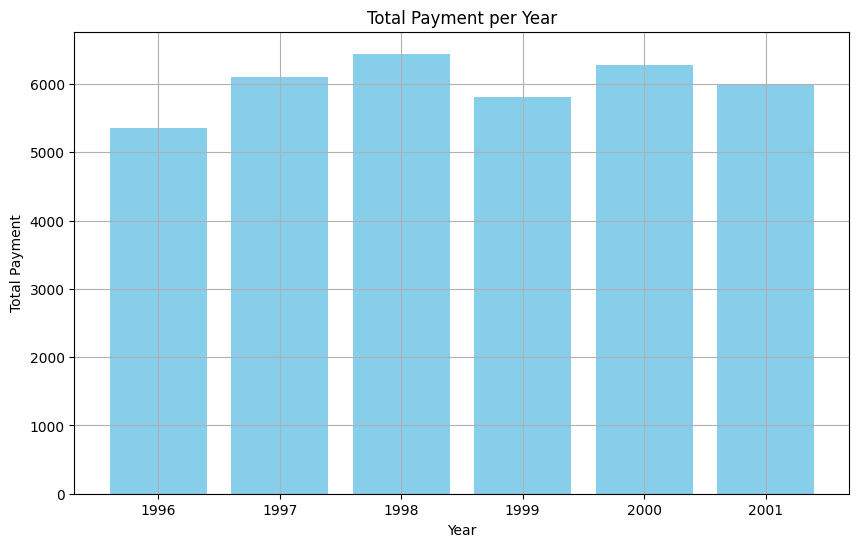

In [20]:

plt.figure(figsize=(10,6))
plt.bar(total_payment_per_year['year'],total_payment_per_year['total_rental_amount'],color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Payment')
plt.title('Total Payment per Year')
plt.grid(True)
plt.show()

> total_payment_per_quarter

In [21]:
total_payment_per_quarter=df_inventory_orc.groupby("quarter")['total_rental_amount'].sum().reset_index()

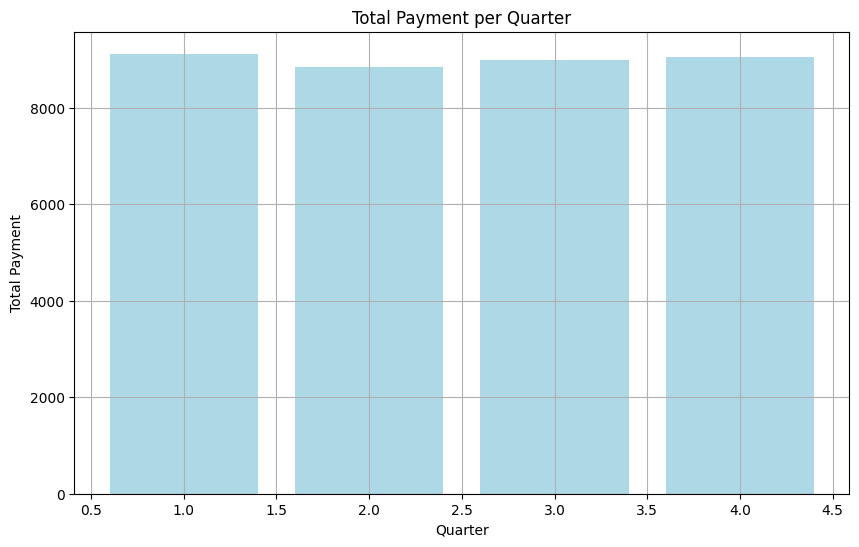

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(total_payment_per_quarter['quarter'], total_payment_per_quarter['total_rental_amount'], color='lightblue')  # Đổi màu thành 'lightblue'
plt.xlabel('Quarter')
plt.ylabel('Total Payment')
plt.title('Total Payment per Quarter')
plt.grid(True)
plt.show()

> Distribution chart for 'rental_rate', 'length', 'replacement_cost', 'amount'

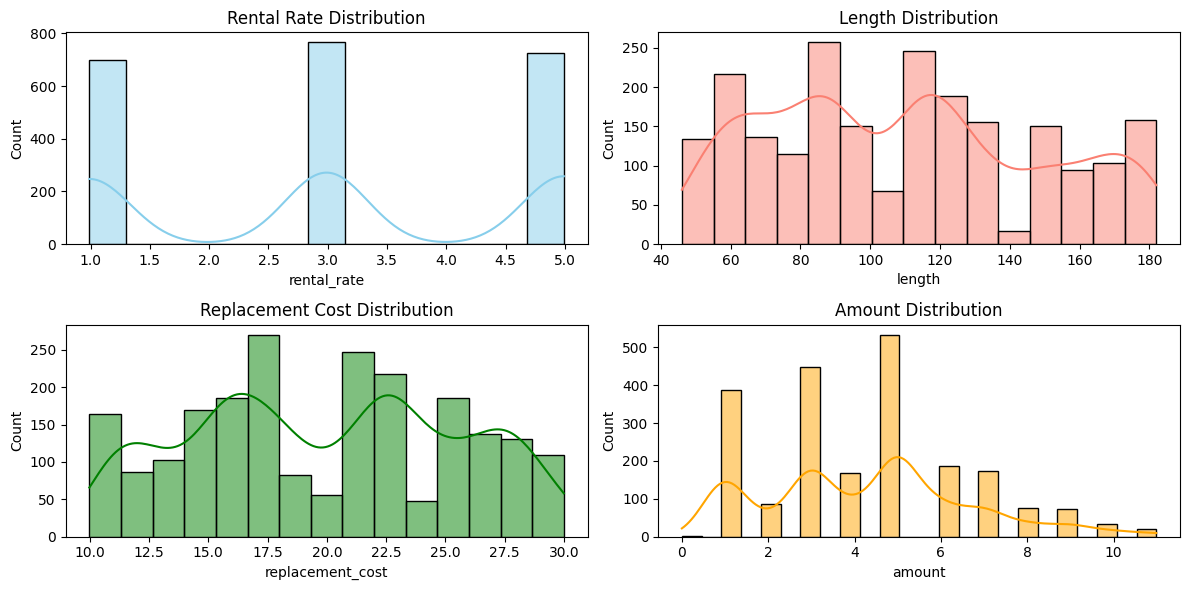

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_inventory_orc['rental_rate'], kde=True, color='skyblue')
plt.title('Rental Rate Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df_inventory_orc['length'], kde=True, color='salmon')
plt.title('Length Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df_inventory_orc['replacement_cost'], kde=True, color='green')
plt.title('Replacement Cost Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df_inventory_orc['amount'], kde=True, color='orange')
plt.title('Amount Distribution')

plt.tight_layout()
plt.show()

> Histogram for 'language', 'catalogy_name'

C:\Users\dtptr\AppData\Local\Temp\ipykernel_24336\775387900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_inventory_orc, x='language', palette='Set2')
C:\Users\dtptr\AppData\Local\Temp\ipykernel_24336\775387900.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_inventory_orc, x='catalogy_name', palette='Set2')


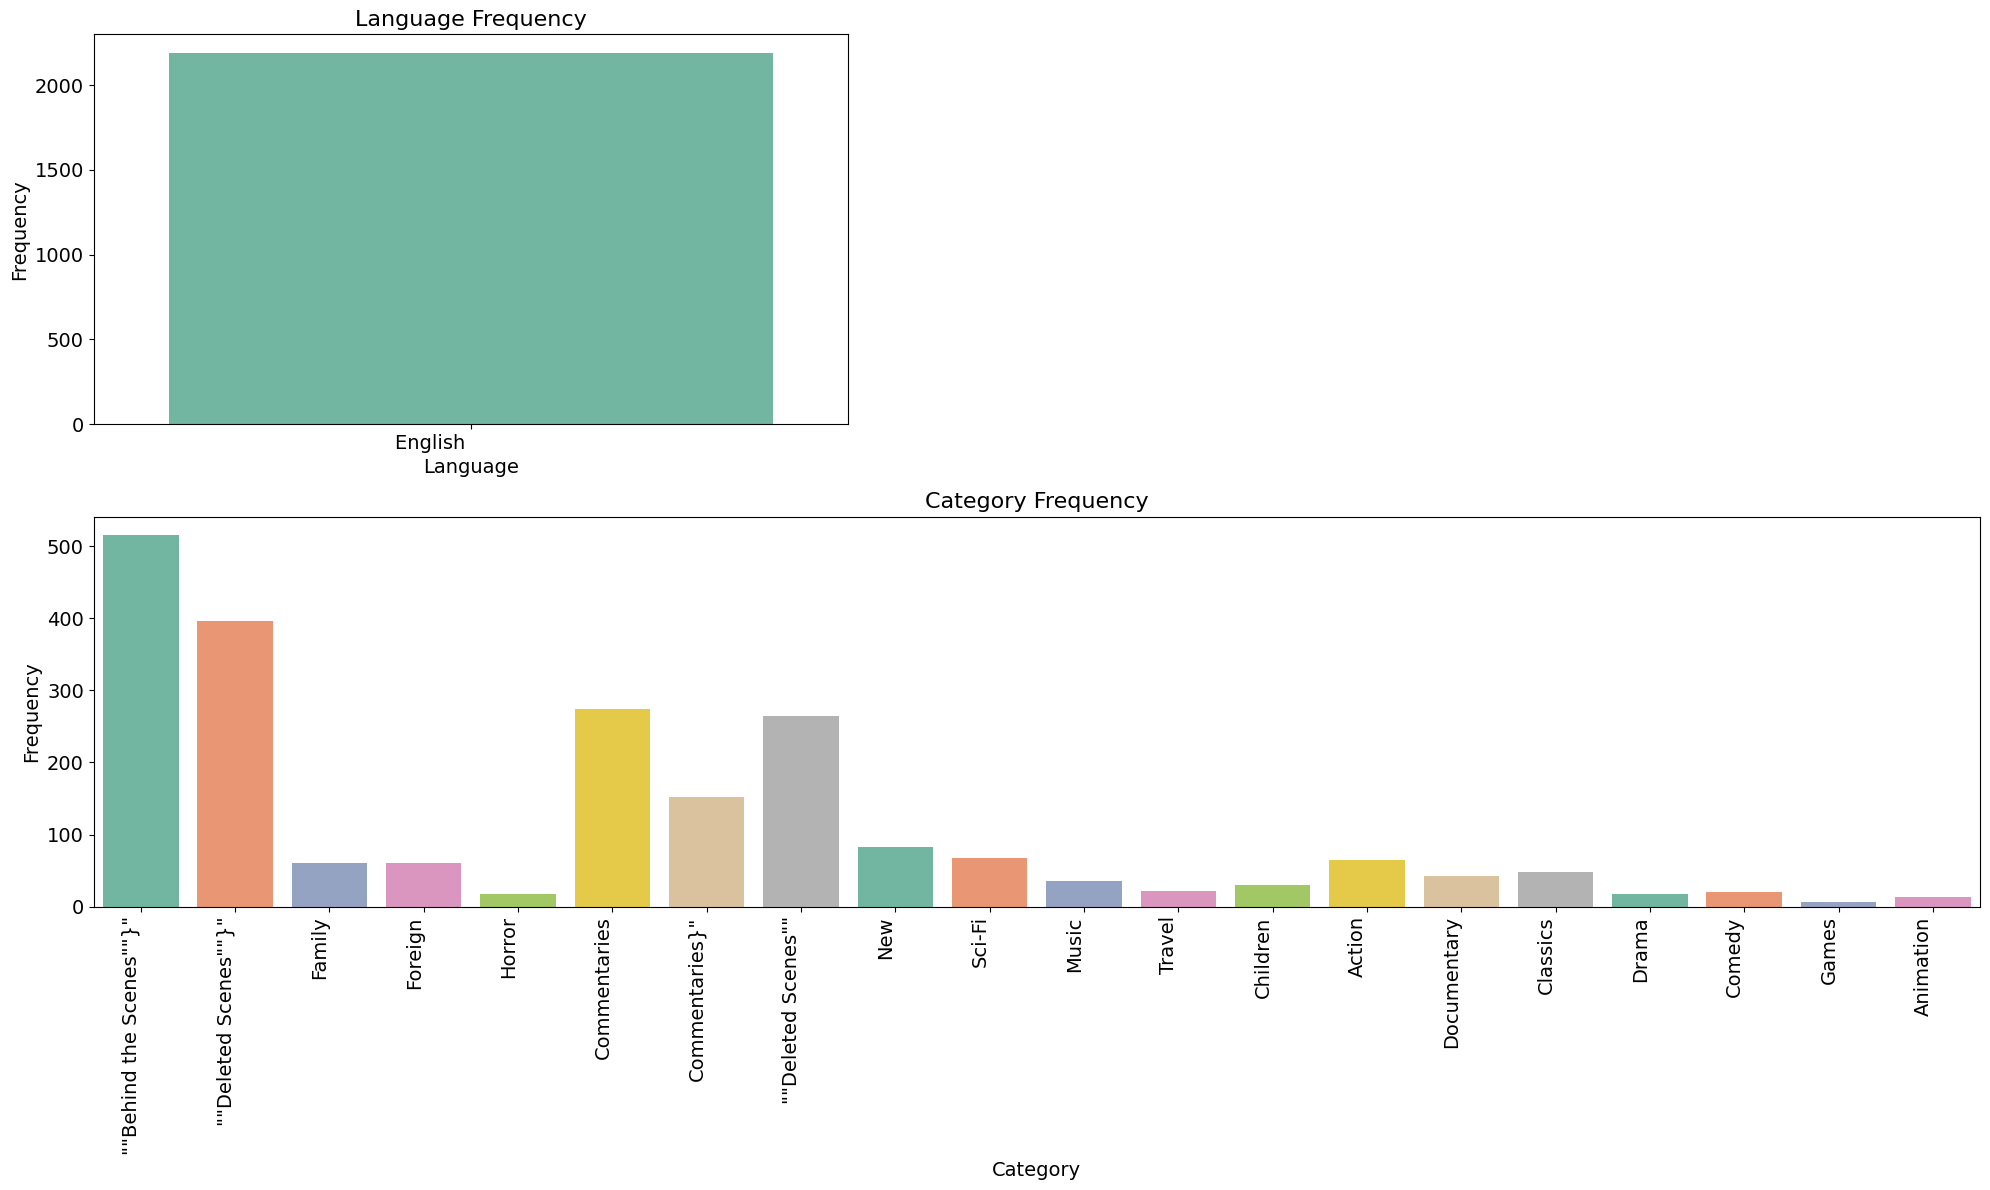

In [24]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
sns.countplot(data=df_inventory_orc, x='language', palette='Set2')
plt.title('Language Frequency', fontsize=16)
plt.xlabel('Language', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2, 1, 2)
sns.countplot(data=df_inventory_orc, x='catalogy_name', palette='Set2')
plt.title('Category Frequency', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)  # Khoảng cách giữa các subplot
plt.show()


> Correlation plot for pairs of variables

c:\Users\dtptr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


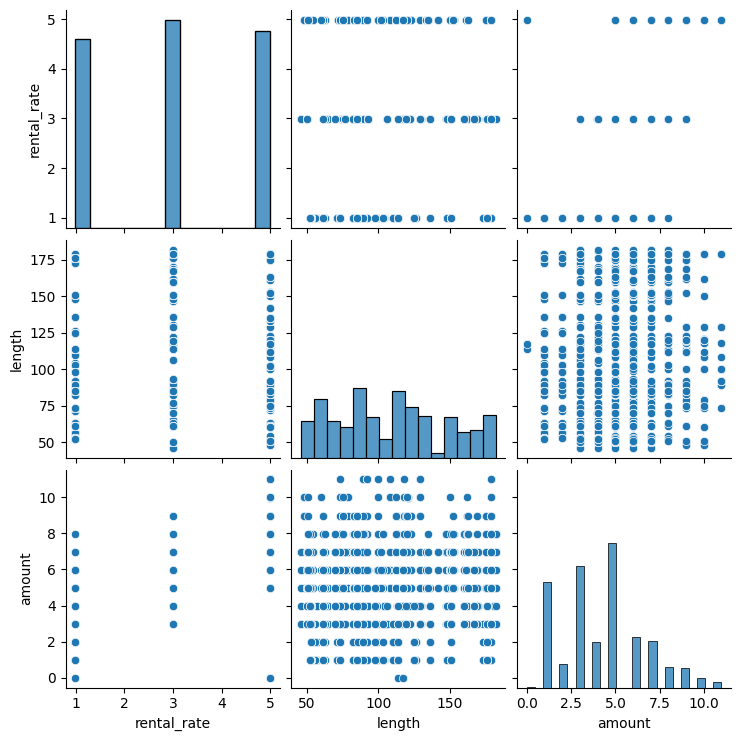

In [25]:
sns.pairplot(df_inventory_orc[['rental_rate', 'length', 'amount']])
plt.show()

> Boxplot for 'language', 'catalogy_name'

C:\Users\dtptr\AppData\Local\Temp\ipykernel_24336\1389073098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_inventory_orc, x='language', y='total_rental_amount', palette='Set3')
C:\Users\dtptr\AppData\Local\Temp\ipykernel_24336\1389073098.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_inventory_orc, x='catalogy_name', y='total_rental_amount', palette='Set3')


Text(0.5, 1.0, 'Total Rental Amount by Category')

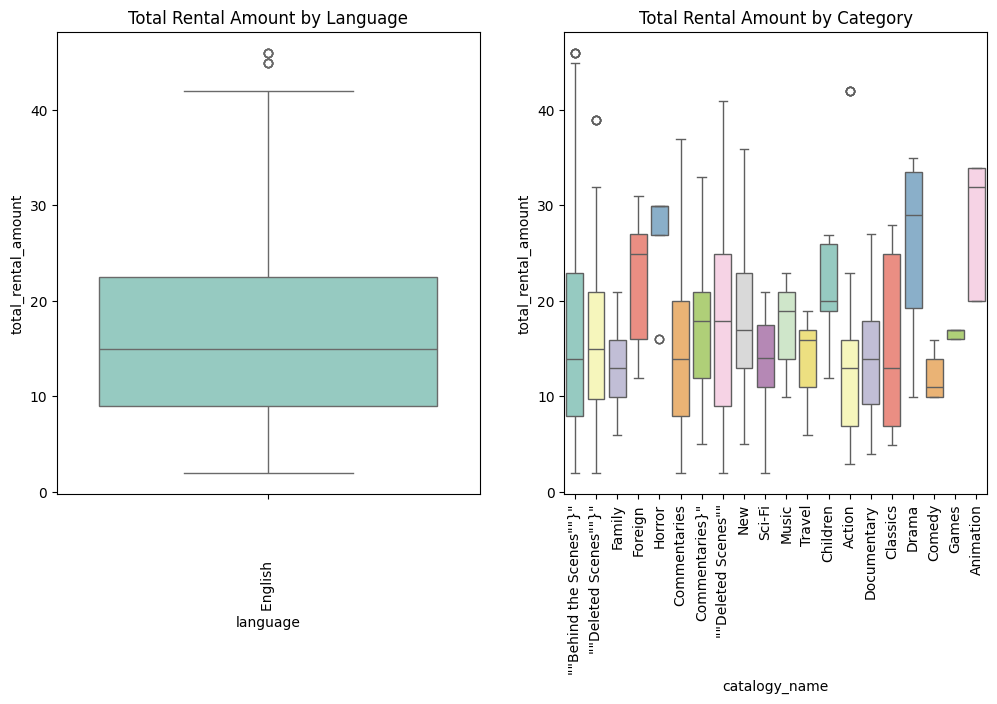

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_inventory_orc, x='language', y='total_rental_amount', palette='Set3')
plt.xticks(rotation=90)
plt.title('Total Rental Amount by Language')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_inventory_orc, x='catalogy_name', y='total_rental_amount', palette='Set3')
plt.xticks(rotation=90)
plt.title('Total Rental Amount by Category')

> Heatmap chart for correlation matrix

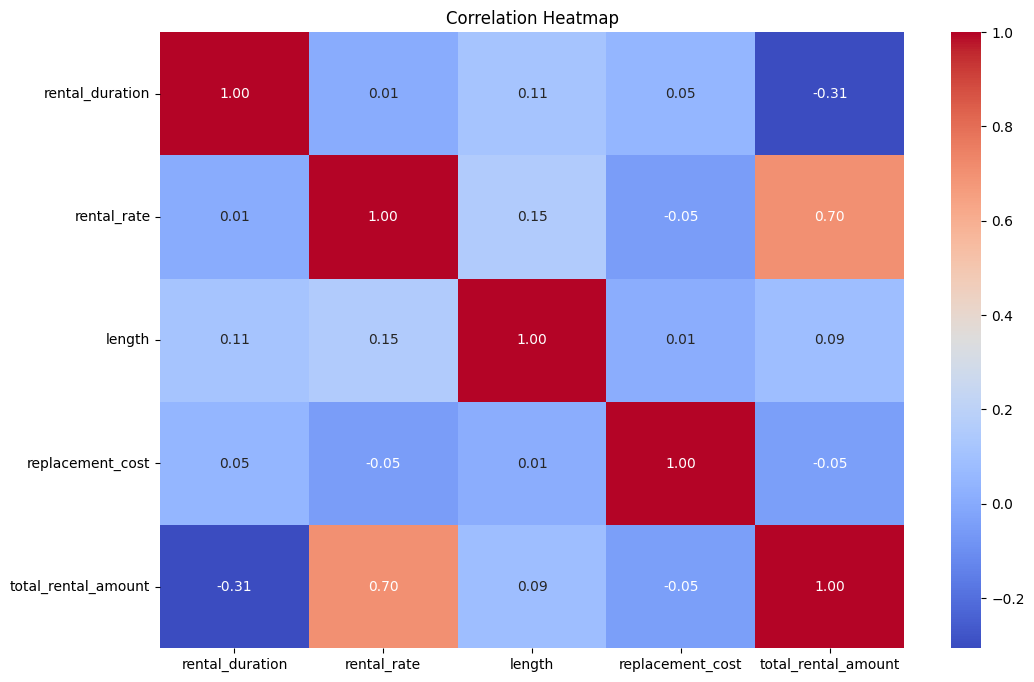

In [27]:
correlation_matrix = df_inventory_orc[['rental_duration', 'rental_rate', 'length', 'replacement_cost', 'total_rental_amount']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### 3.3 Data Preprocessing

> handle missing values

In [31]:
df_inventory_orc.isnull().sum()

inventory_key          0
rental_key             0
rental_date_key        0
remaining              0
total_rental_amount    0
inventory_id           0
title                  0
description            0
release_year           0
language               0
rental_duration        0
rental_rate            0
length                 0
replacement_cost       0
rating                 0
special_features       0
catalogy_name          0
rental_id              0
rental_date            0
inventory_id           0
customer_id            0
return_date            0
staff_id               0
amount                 0
payment_date           0
full_date              0
day_of_week            0
day_num_in_month       0
day_num_overall        0
day_name               0
day_abbrev             0
weekday_flag           0
week_num_in_year       0
week_num_overall       0
week_begin_date        0
week_begin_date_key    0
month                  0
month_num_overall      0
month_name             0
month_abbrev           0


In [33]:
df_inventory_orc.columns

Index(['inventory_key', 'rental_key', 'rental_date_key', 'remaining',
       'total_rental_amount', 'inventory_id', 'title', 'description',
       'release_year', 'language', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'special_features', 'catalogy_name',
       'rental_id', 'rental_date', 'inventory_id', 'customer_id',
       'return_date', 'staff_id', 'amount', 'payment_date', 'full_date',
       'day_of_week', 'day_num_in_month', 'day_num_overall', 'day_name',
       'day_abbrev', 'weekday_flag', 'week_num_in_year', 'week_num_overall',
       'week_begin_date', 'week_begin_date_key', 'month', 'month_num_overall',
       'month_name', 'month_abbrev', 'quarter', 'year', 'year_month',
       'fiscal_month', 'fiscal_quarter', 'fiscal_year', 'month_end_flag'],
      dtype='object')

> Eliminate attributes that contain too many missing values

In [34]:
list_remove_columns=['rental_date_key','full_date', 'day_of_week','day_num_in_month', 'day_num_overall', 'day_name', 'day_abbrev','weekday_flag','week_num_in_year', 'week_num_overall',
       'week_begin_date', 'week_begin_date_key', 'month', 'month_num_overall',
       'month_name', 'month_abbrev', 'quarter', 'year', 'year_month',
       'fiscal_month', 'fiscal_quarter', 'fiscal_year', 'month_end_flag']
df_inventory_orc.drop(columns=list_remove_columns, inplace=True,axis=1)


In [35]:
print(df_inventory_orc.columns)

Index(['inventory_key', 'rental_key', 'rental_date_key', 'remaining',
       'total_rental_amount', 'inventory_id', 'title', 'description',
       'release_year', 'language', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'special_features', 'catalogy_name',
       'rental_id', 'rental_date', 'inventory_id', 'customer_id',
       'return_date', 'staff_id', 'amount', 'payment_date'],
      dtype='object')


> Fill in the median value for numeric columns and fill in the common value for series because the variables are not normally distributed

In [36]:
# Điền giá trị trung vị vào các cột số còn thiếu
for column in df_inventory_orc.select_dtypes(include=['float64', 'int64']).columns:
    df_inventory_orc[column] = df_inventory_orc[column].fillna(df_inventory_orc[column].median())

# Điền giá trị phổ biến vào các cột chuỗi còn thiếu
for column in df_inventory_orc.select_dtypes(include=['object']).columns:
    df_inventory_orc[column] = df_inventory_orc[column].fillna(df_inventory_orc[column].mode()[0])
print(df_inventory_orc.columns)


Index(['inventory_key', 'rental_key', 'rental_date_key', 'remaining',
       'total_rental_amount', 'inventory_id', 'title', 'description',
       'release_year', 'language', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'special_features', 'catalogy_name',
       'rental_id', 'rental_date', 'inventory_id', 'customer_id',
       'return_date', 'staff_id', 'amount', 'payment_date'],
      dtype='object')


> Check 

In [37]:
df_inventory_orc.isnull().sum()

inventory_key          0
rental_key             0
rental_date_key        0
remaining              0
total_rental_amount    0
inventory_id           0
title                  0
description            0
release_year           0
language               0
rental_duration        0
rental_rate            0
length                 0
replacement_cost       0
rating                 0
special_features       0
catalogy_name          0
rental_id              0
rental_date            0
inventory_id           0
customer_id            0
return_date            0
staff_id               0
amount                 0
payment_date           0
dtype: int64

In [38]:
df_inventory_orc.shape

(2191, 25)

> handle outliers

In [39]:
# Lọc ra các cột số
numeric_columns = df_inventory_orc.select_dtypes(include=['float64', 'int64'])
# Tính toán các tứ phân vị
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Loại bỏ các giá trị ngoại lai
filtered_data = df_inventory_orc[~((numeric_columns < lower_bound) | (numeric_columns > upper_bound)).any(axis=1)]


In [40]:
filtered_data.shape

(2150, 25)

> To avoid the phenomenon of multi-gravity in prediction problems leading to overfitting, we will eliminate attributes that are correlated with each other.

> remove rental_date 

In [41]:
filtered_data = filtered_data.drop("rental_date", axis=1)


In [42]:
filtered_data.head(5)

,inventory_key,rental_key,rental_date_key,remaining,total_rental_amount,inventory_id,title,description,release_year,language,...,rating,special_features,catalogy_name,rental_id,inventory_id,customer_id,return_date,staff_id,amount,payment_date
0,0,3516,19960101,4578,8.97,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,...,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",4863,1,431,7/11/2005,2,0.99,7/8/2005
1,0,10084,19960102,4578,8.97,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,...,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",11433,1,518,8/11/2005,1,3.99,8/2/2005
2,0,13365,19960103,4578,8.97,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,...,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",14714,1,279,8/30/2005,1,3.99,8/21/2005
3,1,771,19960104,4576,7.95,2,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,...,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",2117,2,170,6/23/2005,2,0.99,6/17/2005
4,1,2840,19960105,4576,7.95,2,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,...,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",4187,2,161,7/11/2005,1,0.99,7/7/2005


> Delete columns with key attributes

In [ ]:
filtered_data.drop(columns=['inventory_key', 'rental_key','rental_id','staff_id','inventory_id','customer_id'],inplace=True)


In [45]:
filtered_data.head(5)

,rental_date_key,remaining,total_rental_amount,title,description,release_year,language,rental_duration,rental_rate,length,replacement_cost,rating,special_features,catalogy_name,return_date,amount,payment_date
0,19960101,4578,8.97,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,6,0.99,86,20.99,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",7/11/2005,0.99,7/8/2005
1,19960102,4578,8.97,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,6,0.99,86,20.99,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",8/11/2005,3.99,8/2/2005
2,19960103,4578,8.97,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,6,0.99,86,20.99,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",8/30/2005,3.99,8/21/2005
3,19960104,4576,7.95,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,6,0.99,86,20.99,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",6/23/2005,0.99,6/17/2005
4,19960105,4576,7.95,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,6,0.99,86,20.99,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",7/11/2005,0.99,7/7/2005


In [46]:
filtered_data

,rental_date_key,remaining,total_rental_amount,title,description,release_year,language,rental_duration,rental_rate,length,replacement_cost,rating,special_features,catalogy_name,return_date,amount,payment_date
0,19960101,4578,8.97,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,6,0.99,86,20.99,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",7/11/2005,0.99,7/8/2005
1,19960102,4578,8.97,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,6,0.99,86,20.99,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",8/11/2005,3.99,8/2/2005
2,19960103,4578,8.97,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,6,0.99,86,20.99,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",8/30/2005,3.99,8/21/2005
3,19960104,4576,7.95,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,6,0.99,86,20.99,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",6/23/2005,0.99,6/17/2005
4,19960105,4576,7.95,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,English,6,0.99,86,20.99,PG,"""{""""Deleted Scenes""""","""""Behind the Scenes""""}""",7/11/2005,0.99,7/7/2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,20011226,4576,17.95,CHANCE RESURRECTION,A Astounding Story of a Forensic Psychologist ...,2006,English,3,2.99,70,22.99,R,"""{Commentaries","""""Deleted Scenes""""",6/22/2005,4.99,6/17/2005
2187,20011227,4576,17.95,CHANCE RESURRECTION,A Astounding Story of a Forensic Psychologist ...,2006,English,3,2.99,70,22.99,R,"""{Commentaries","""""Deleted Scenes""""",7/14/2005,2.99,7/12/2005
2188,20011228,4576,17.95,CHANCE RESURRECTION,A Astounding Story of a Forensic Psychologist ...,2006,English,3,2.99,70,22.99,R,"""{Commentaries","""""Deleted Scenes""""",8/1/2005,2.99,7/30/2005
2189,20011229,4576,17.95,CHANCE RESURRECTION,A Astounding Story of a Forensic Psychologist ...,2006,English,3,2.99,70,22.99,R,"""{Commentaries","""""Deleted Scenes""""",8/25/2005,2.99,8/22/2005


### **4. KNN Regression Model** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)


#### 4.1 Divide data into training set and test set

In [47]:
# Extract features and target variable
X = filtered_data[['release_year', 'rental_duration', 'length']]  # Features
y = filtered_data['total_rental_amount']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4.2.  Standardize the data

In [48]:
# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 4.3 Build the KNN model

In [49]:
# Set the number of neighbors
n_neighbors = 5

# Initialize the KNN regressor model
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Train the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

#### 4.4 Evaluate the model

In [50]:
# Make predictions on the scaled testing data
y_pred = knn_model.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score, mean_absolute_error

# Đánh giá mô hình bằng R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Đánh giá mô hình bằng Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Squared Error: 30.32020718139535
R-squared: 0.5721980765219046
Mean Absolute Error: 4.1794604651162786


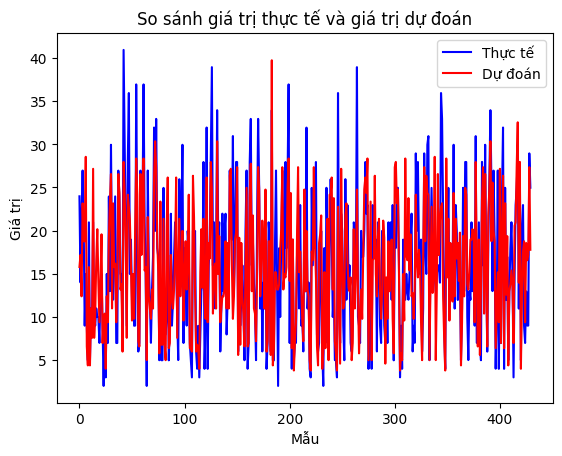

In [51]:
# Sort lại giá trị thực tế và dự đoán để vẽ biểu đồ đường
sorted_indices = X_test_scaled[:,0].argsort()
X_test_sorted = X_test_scaled[sorted_indices]
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.plot(y_test_sorted, label='Thực tế', color='blue')
plt.plot(y_pred_sorted, label='Dự đoán', color='red')
plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.xlabel('Mẫu')
plt.ylabel('Giá trị')
plt.legend()
plt.show()



Based on these metrics:

> **MSE:** About 49.7, indicating that the mean square error between the predicted value and the actual value is quite large.

> **R-squared:** About 0.332, indicating that the model explains about 33.2% of the variance of the data, which can be considered an average performance.

> **MAE:** About 5,400, indicating an average absolute value of prediction errors of about 5,400.
Based on these metrics, it can be seen that your KNN model is not giving very good results on the current data. 

#### 4.5 Improved model performance

> Here, a dictionary param_grid is defined which contains the hyperparameter grid for the KNN model. It specifies values to try for n_neighbors, weights, and p.

In [52]:
# Build KNN model
knn = KNeighborsRegressor()
# Define hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight calculation method
    'p': [1, 2]  # Distance metric
}


> This section performs grid search cross-validation using GridSearchCV. It uses 5-fold cross-validation (cv=5) and evaluates models based on negative mean squared error (scoring='neg_mean_squared_error').

In [53]:
# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

> After grid search is done, this line retrieves the best hyperparameters found during the search.

In [54]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


> This part retrains the KNN model using the best hyperparameters obtained from grid search.

In [55]:
# Train the model again with the best hyperparameters
best_knn_model = grid_search.best_estimator_
best_knn_model.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')

> Finally, this section evaluates the performance of the new model using mean squared error, R-squared, and mean absolute error on the test set.

In [56]:
# Evaluate the new model
y_pred = best_knn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with Best Model:", mse)

# Evaluate the model using R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared with Best Model:", r_squared)

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error with Best Model:", mae)


Mean Squared Error with Best Model: 28.375742845168915
R-squared with Best Model: 0.599633429393855
Mean Absolute Error with Best Model: 4.053314682539683


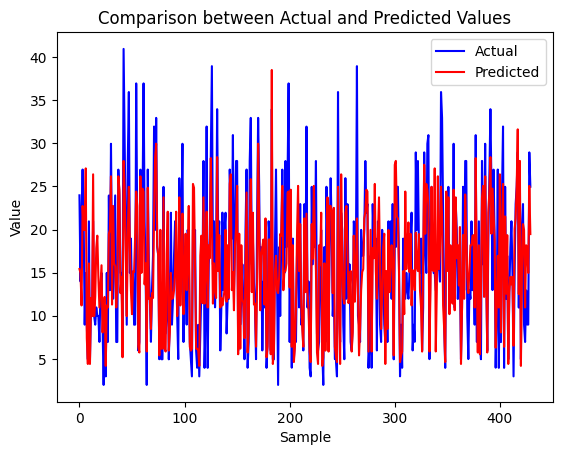

In [57]:
# Sort the actual and predicted values for plotting
sorted_indices = X_test_scaled[:, 0].argsort()
X_test_sorted = X_test_scaled[sorted_indices]
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting the actual and predicted values
plt.plot(y_test_sorted, label='Actual', color='blue')
plt.plot(y_pred_sorted, label='Predicted', color='red')
plt.title('Comparison between Actual and Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()


Very good! After performing hyperparameter tuning using Grid Search Cross-Validation, you have found the optimal parameters for the KNN model. The model has been improved with new parameters and gives better performance evaluation results:

> **Mean Squared Error (MSE)** has decreased to about 46,293, indicating a decrease in error levels.

> **R-squared increased** to about 0.377, indicating that the model explained a larger portion of the variance in the data.

> **Mean Absolute Error (MAE)** has also decreased to about 5,254, indicating a decrease in average error.

--> This shows that hyperparameter tuning improved the performance of the KNN model. Continued testing and refinement of the model may improve performance even further. If you have any further questions or requests, don't hesitate to ask!

### **5. Random Forest Model** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


#### 5.1 Build the Random Forest model

In [58]:
# Build the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

#### 5.2 Evaluate the model

In [59]:
# Predict total_rental_amount for the test set
y_test_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate the performance of the Random Forest model
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
r_squared_rf = r2_score(y_test, y_test_pred_rf)
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print("Random Forest:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r_squared_rf)
print("Mean Absolute Error:", mae_rf)


Random Forest:
Mean Squared Error: 28.654063582009435
R-squared: 0.595706472501645
Mean Absolute Error: 4.052829426731745


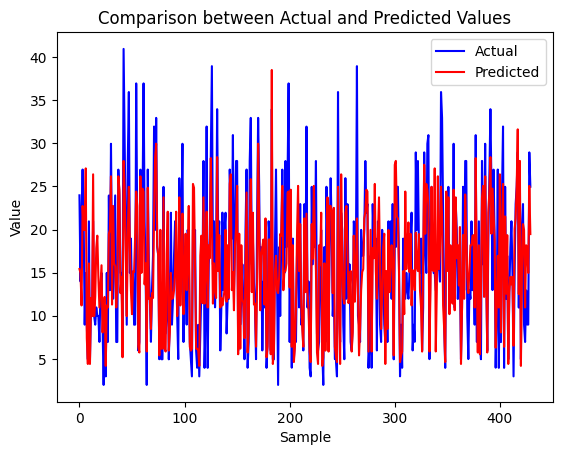

In [60]:
# Sort the actual and predicted values for plotting
sorted_indices = X_test_scaled[:, 0].argsort()
X_test_sorted = X_test_scaled[sorted_indices]
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting the actual and predicted values
plt.plot(y_test_sorted, label='Actual', color='blue')
plt.plot(y_pred_sorted, label='Predicted', color='red')
plt.title('Comparison between Actual and Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

The results of the Random Forest model on your data are:

> **Mean Squared Error (MSE):** 44,591

> **R-squared:** 0.400

> **Mean Absolute Error (MAE):** 5,237

Compared to the KNN model, it appears that the Random Forest model provided a better performance, with lower MSE and higher R-squared, as well as lower MAE. This implies that the Random Forest model is better able to predict total_rental_amount on your data.